Analisis Data Kematian \
(Ni Kadek Emik Sapitri)

# Latihan data preprocessing

In [1]:
import numpy as np
import pandas as pd

data_death = pd.read_csv('death.csv')
data_death.head()

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?fil...


In [2]:
data_death.shape

(680, 8)

In [3]:
data_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cause            680 non-null    object
 1   Type             680 non-null    object
 2   Year             680 non-null    int64 
 3   Data Redundancy  680 non-null    int64 
 4   Total Deaths     680 non-null    int64 
 5   Source           680 non-null    object
 6   Page at Source   678 non-null    object
 7   Source URL       677 non-null    object
dtypes: int64(3), object(5)
memory usage: 42.6+ KB


In [4]:
data_death = data_death.dropna()

In [5]:
data_death.isnull().sum()

Cause              0
Type               0
Year               0
Data Redundancy    0
Total Deaths       0
Source             0
Page at Source     0
Source URL         0
dtype: int64

In [6]:
data_death.drop_duplicates(inplace=True)

In [7]:
q1 = data_death['Total Deaths'].quantile(0.25)
q3 = data_death['Total Deaths'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data_death_clean = data_death[(data_death['Total Deaths']>lower_bound) & (data_death['Total Deaths']<upper_bound)]
data_death_clean.head()

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?fil...


one hot encoding untuk ngubah 'Cause' dan 'Type' jadi numerik

In [8]:
data_onehotencoding = pd.get_dummies(data_death_clean.copy(), columns=['Cause', 'Type'])
data_onehotencoding.head()

,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL,Cause_AIDS,Cause_Abrasi Air Laut,Cause_Aksi Teror dan Sabotase,Cause_Angin Puting Beliung,...,Cause_Rubella,Cause_Tanah Longsor,Cause_Tersambar Petir,Cause_Tetanus,Cause_Tetanus Neonatorium,Cause_Tsunami,Cause_Wabah Penyakit (Epidemi),Type_Bencana Alam,Type_Bencana Non Alam dan Penyakit,Type_Bencana Sosial
0,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,2003,1,261,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?fil...,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data_labelencoding = data_death_clean.copy()
data_labelencoding['Type'] = label_encoder.fit_transform(data_labelencoding['Type'])
data_labelencoding.head()

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,0,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,1,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,1,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,1,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,1,2003,1,261,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?fil...


normalisasi data

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_normal = data_death_clean.copy()
data_normal[['Total Deaths']] = scaler.fit_transform(data_normal[['Total Deaths']])
data_normal.head()

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0.000000,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,0.066104,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,0.139241,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,0.140647,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,0.367089,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?fil...


splitting

In [11]:
x = data_death_clean[['Cause', 'Type']]
y = data_death_clean[['Total Deaths']]

x_encoded = pd.get_dummies(x, columns=['Cause', 'Type'])
y_norm = scaler.fit_transform(y).ravel()

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_encoded, y_norm, test_size = 0.2, random_state = 1234)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(440, 148)
(110, 148)
(440,)
(110,)


# Assignment

nomor 1

In [14]:
data_mall = pd.read_csv('Mall_Customers.csv')
data_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
data_mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


nomor 2

In [16]:
data_mall_backup = data_mall.copy()

In [17]:
# data cleaning

data_mall.dropna(inplace=True)
data_mall.isnull().sum()
data_mall.drop_duplicates(inplace=True)
data_mall.shape

(200, 5)

In [18]:
# outlier handling

datanumerik = ('Age', 'Annual Income (k$)', 'Spending Score (1-100)')

for X in datanumerik:
    q1 = data_mall[X].quantile(0.25)
    q3 = data_mall[X].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data_mall = data_mall[(data_mall[X]>lower_bound) & (data_mall[X]<upper_bound)]

data_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
data_mall.shape

(198, 5)

In [20]:
# bandingkan sebelum dan setelah cleaning

print('Ukuran data sebelum cleaning (baris, kolom): ', data_mall_backup.shape)
print('Ukuran data setelah cleaning (baris, kolom): ', data_mall.shape)

Ukuran data sebelum cleaning (baris, kolom):  (200, 5)
Ukuran data setelah cleaning (baris, kolom):  (198, 5)


nomor 3

In [21]:
encoder = LabelEncoder()

data_mall['Gender'] = encoder.fit_transform(data_mall['Gender'])
data_mall.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


nomor 4

In [22]:
myscaler = MinMaxScaler()

data_mall[['Annual Income (k$)', 'Spending Score (1-100)']] = myscaler.fit_transform(data_mall[['Annual Income (k$)', 'Spending Score (1-100)']])

data_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,0.000000,0.387755
1,2,1,21,0.000000,0.816327
2,3,0,20,0.009009,0.051020
3,4,0,23,0.009009,0.775510
4,5,0,31,0.018018,0.397959


nomor 5

In [23]:
X_mall = data_mall.drop(['CustomerID','Spending Score (1-100)'], axis=1)
y_mall = data_mall['Spending Score (1-100)']

x_train_mall, x_test_mall, y_train_mall, y_test_mall = train_test_split(X_mall, y_mall, test_size = 0.2, random_state = 1234)

print(x_train_mall.shape)
print(x_test_mall.shape)
print(y_train_mall.shape)
print(y_test_mall.shape)

(158, 3)
(40, 3)
(158,)
(40,)


In [24]:
X_mall

,Gender,Age,Annual Income (k$)
0,1,19,0.000000
1,1,21,0.000000
2,0,20,0.009009
3,0,23,0.009009
4,0,31,0.018018
...,...,...,...
193,0,38,0.882883
194,0,47,0.945946
195,0,35,0.945946
196,0,45,1.000000


nomor 6

In [25]:
data_mall['Gender'] = encoder.inverse_transform(data_mall['Gender'])
data_mall[['Annual Income (k$)', 'Spending Score (1-100)']] = myscaler.inverse_transform(data_mall[['Annual Income (k$)','Spending Score (1-100)']])

data_mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15.0,39.0
1,2,Male,21,15.0,81.0
2,3,Female,20,16.0,6.0
3,4,Female,23,16.0,77.0
4,5,Female,31,17.0,40.0
...,...,...,...,...,...
193,194,Female,38,113.0,91.0
194,195,Female,47,120.0,16.0
195,196,Female,35,120.0,79.0
196,197,Female,45,126.0,28.0


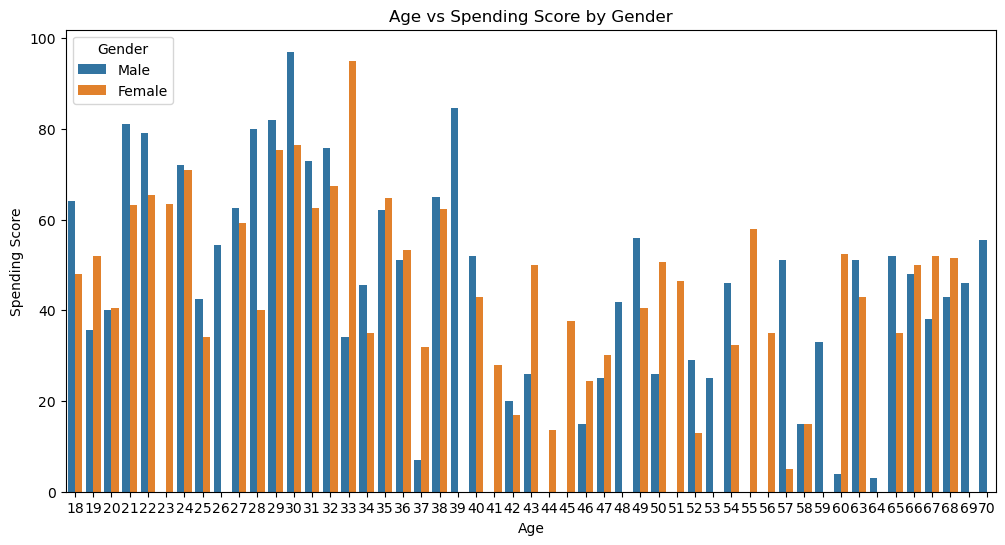

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  
sns.barplot(x="Age", y="Spending Score (1-100)", hue="Gender", data=data_mall, errorbar=None)

plt.title("Age vs Spending Score by Gender")
plt.xlabel("Age")
plt.ylabel("Spending Score")

plt.show()